<center> <img alt="DAGsHub" width=500px src=https://raw.githubusercontent.com/DAGsHub/client/master/dagshub_github.png> </center>

# Stack Exchange Tutorial - Exploratory Data Analysis (EDA)
This notebook is the analysis of the data used in [DAGsHub's tutorial](https://dagshub.com/docs/experiment-tutorial/overview/).

It's here mostly to give more in-depth explanations and code for those who are interested, and allows you to easily modify the code and try different things.

If you just want to learn how to use DAGsHub, we suggest you just read through the [tutorial](https://dagshub.com/docs/experiment-tutorial/overview/), where we [explain the important parts of the results of this EDA](https://dagshub.com/docs/tutorial/0-data), as well as:

* [How to experiment with different models, data preprocessing and feature engineering](https://dagshub.com/docs/experiment-tutorial/2-experiments/)
* How to keep versions of your data and models, so that all of your experiments are automatically reproducible - TBD – for now go to our [Data Versioning Tutorial to learn this](https://dagshub.com/docs/tutorial/overview/)

In [ ]:
# IMPORTANT! Restart the runtine after running this cell once
# !pip install --upgrade pandas-profiling==2.9.0

## Download raw data
The source of the data is the Cross Validated Stack Exchange API.
It's a table of Questions.

You can find the original query, play with it, get updated data, etc. here: https://data.stackexchange.com/stats/query/1290704/relevant-crossvalidated-posts-latest

For your convenience and in order for you to get consistent results with the tutorial, we've stored this data on our publically
readable cloud storage.

In [2]:
# !wget https://dagshub-public.s3.us-east-2.amazonaws.com/tutorials/stackexchange/CrossValidated-Questions-Nov-2020.csv -O CrossValidated-Questions.csv
!curl -o CrossValidated-Questions.csv https://dagshub-public.s3.us-east-2.amazonaws.com/tutorials/stackexchange/CrossValidated-Questions-Nov-2020.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 72.3M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 72.3M    0  142k    0     0  62467      0  0:20:14  0:00:02  0:20:12 62644
  1 72.3M    1 1060k    0     0   295k      0  0:04:10  0:00:03  0:04:07  296k
  4 72.3M    4 3312k    0     0   770k      0  0:01:36  0:00:04  0:01:32  771k
  6 72.3M    6 4912k    0     0   921k      0  0:01:20  0:00:05  0:01:15  985k
  8 72.3M    8 6224k    0     0   987k      0  0:01:15  0:00:06  0:01:09 1329k
  9 72.3M    9 7168k    0     0   980k      0  0:01:15  0:00:07  0:01:08 1414k
 10 72.3M   10 7968k    0     0   957k      0  0:01:17  0:00:08  0:01:09 1458k
 11 72.3M   11 8576k    0     0   920k      0  0:01

## Load data for processing
Since this is a CSV file, we can load it using [Pandas](https://pandas.pydata.org/) for processing.

In [6]:
import pandas as pd
df = pd.read_csv('CrossValidated-Questions.csv')
df

Id                                              Title  \
0      495508        Accepting null hypothesis given specificity   
1      495507  How do I calculate the probability of victory,...   
2      495506  Is joint modelling with survival and longitudi...   
3      495503    Are Spiking Neural Networks The Next Big Thing?   
4      495502  Public data and examples for practicing distri...   
...       ...                                                ...   
49995  371394  How to draw one standard deviation range aroun...   
49996  371389  Beta regression where fractional response adds...   
49997  371388  Proof of alternative parameterization of Weibu...   
49998  371386               A powerful test for any distribution   
49999  371383  Cox regression - non-time dependent continuous...   

                                                    Body  \
0      <p>In a population of 10000 people, there is a...   
1      <p>If I have a poll of 600 people (standard de...   
2      <p>I would like to know if joint models for su...   
3      <p>Intel recently announced their Loihi chip a...   
4      <p>Are there public data for practicing distri...   
...                                                  ...   
49995  <p>I have a distribution of data with a positi...   
49996  <p>I have a data set of people switching brand...   
49997  <p>In Parametric Survival Models by German Rod...   
49998  <p>Simulations by Razali et al (2011) showed t...   
49999  <p>I have this model I want to run that has no...   

                                                    Tags         CreationDate  \
0                                    <bayesian><p-value>  2020-11-08 03:59:02   
1      <probability><normal-distribution><t-distribut...  2020-11-08 02:09:11   
2                                 <survival><panel-data>  2020-11-08 01:55:08   
3      <machine-learning><neural-networks><sparse><ar...  2020-11-08 00:37:13   
4                                 <references><learning>  2020-11-08 00:09:25   
...                                                  ...                  ...   
49995  <distributions><mathematical-statistics><mean>...  2018-10-11 18:36:02   
49996                      <proportion><beta-regression>  2018-10-11 17:55:19   
49997      <survival><weibull><exponential-distribution>  2018-10-11 17:51:32   
49998  <hypothesis-testing><goodness-of-fit><normalit...  2018-10-11 17:39:16   
49999     <r><survival><cox-model><proportional-hazards>  2018-10-11 17:29:12   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  
0          0          5            0             2            NaN  
1          0         20            0             0            NaN  
2          0          5            0             0            NaN  
3          0         18            0             4            NaN  
4          1         10            0             3            1.0  
...      ...        ...          ...           ...            ...  
49995      0         52            1             3            NaN  
49996      2         97            0             2            1.0  
49997      2        178            0             1            NaN  
49998      1        111            1             4            NaN  
49999      0         81            1             3            NaN  

[50000 rows x 10 columns]

The columns are pretty self explanatory - we have:

* Two textual features (`Title` & `Body`).

  We can already tell that this text is actually full of HTML tags, which we will probably need to clean to get good results.
  
* One string column that is actually the list of `Tags` for this question. This contains the target `machine-learning` tag we want to predict.
* Some numeric features: `Score, ViewCount, AnswerCount, CommentCount, FavoriteCount`
* One `CreationDate` feature that needs to be processed correctly:

In [7]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
# Also include the numeric representation of the timestamp, so we can look at its distribution / correlation with other features
df['CreationDate_Epoch'] = df['CreationDate'].astype('int64') // 10 ** 9
df.head()

Id                                              Title  \
0  495508        Accepting null hypothesis given specificity   
1  495507  How do I calculate the probability of victory,...   
2  495506  Is joint modelling with survival and longitudi...   
3  495503    Are Spiking Neural Networks The Next Big Thing?   
4  495502  Public data and examples for practicing distri...   

                                                Body  \
0  <p>In a population of 10000 people, there is a...   
1  <p>If I have a poll of 600 people (standard de...   
2  <p>I would like to know if joint models for su...   
3  <p>Intel recently announced their Loihi chip a...   
4  <p>Are there public data for practicing distri...   

                                                Tags        CreationDate  \
0                                <bayesian><p-value> 2020-11-08 03:59:02   
1  <probability><normal-distribution><t-distribut... 2020-11-08 02:09:11   
2                             <survival><panel-data> 2020-11-08 01:55:08   
3  <machine-learning><neural-networks><sparse><ar... 2020-11-08 00:37:13   
4                             <references><learning> 2020-11-08 00:09:25   

   Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      0          5            0             2            NaN   
1      0         20            0             0            NaN   
2      0          5            0             0            NaN   
3      0         18            0             4            NaN   
4      1         10            0             3            1.0   

   CreationDate_Epoch  
0          1604807942  
1          1604801351  
2          1604800508  
3          1604795833  
4          1604794165

Also, remember that our end goal here is to **classify questions about Machine Learning**.
This information is stored in the `Tags` column:

In [8]:
df['MachineLearning'] = df['Tags'].str.contains('machine-learning').fillna(False)
df.head()


Id                                              Title  \
0  495508        Accepting null hypothesis given specificity   
1  495507  How do I calculate the probability of victory,...   
2  495506  Is joint modelling with survival and longitudi...   
3  495503    Are Spiking Neural Networks The Next Big Thing?   
4  495502  Public data and examples for practicing distri...   

                                                Body  \
0  <p>In a population of 10000 people, there is a...   
1  <p>If I have a poll of 600 people (standard de...   
2  <p>I would like to know if joint models for su...   
3  <p>Intel recently announced their Loihi chip a...   
4  <p>Are there public data for practicing distri...   

                                                Tags        CreationDate  \
0                                <bayesian><p-value> 2020-11-08 03:59:02   
1  <probability><normal-distribution><t-distribut... 2020-11-08 02:09:11   
2                             <survival><panel-data> 2020-11-08 01:55:08   
3  <machine-learning><neural-networks><sparse><ar... 2020-11-08 00:37:13   
4                             <references><learning> 2020-11-08 00:09:25   

   Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      0          5            0             2            NaN   
1      0         20            0             0            NaN   
2      0          5            0             0            NaN   
3      0         18            0             4            NaN   
4      1         10            0             3            1.0   

   CreationDate_Epoch  MachineLearning  
0          1604807942            False  
1          1604801351            False  
2          1604800508            False  
3          1604795833             True  
4          1604794165            False

Now we can drop the non-informative columns

In [9]:
df = df.drop(columns=['Id','Tags'])
df.head()


Title  \
0        Accepting null hypothesis given specificity   
1  How do I calculate the probability of victory,...   
2  Is joint modelling with survival and longitudi...   
3    Are Spiking Neural Networks The Next Big Thing?   
4  Public data and examples for practicing distri...   

                                                Body        CreationDate  \
0  <p>In a population of 10000 people, there is a... 2020-11-08 03:59:02   
1  <p>If I have a poll of 600 people (standard de... 2020-11-08 02:09:11   
2  <p>I would like to know if joint models for su... 2020-11-08 01:55:08   
3  <p>Intel recently announced their Loihi chip a... 2020-11-08 00:37:13   
4  <p>Are there public data for practicing distri... 2020-11-08 00:09:25   

   Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      0          5            0             2            NaN   
1      0         20            0             0            NaN   
2      0          5            0             0            NaN   
3      0         18            0             4            NaN   
4      1         10            0             3            1.0   

   CreationDate_Epoch  MachineLearning  
0          1604807942            False  
1          1604801351            False  
2          1604800508            False  
3          1604795833             True  
4          1604794165            False

Some positive and negative samples:

In [10]:
df[df['MachineLearning']].sample(5)

Title  \
34574  Can data ever be too high dimensional for the ...   
38173  Why are some robust algorithms valid for Tucke...   
16329  Why does AdaBoost use decision stumps instead ...   
2569   QDA - Missing term in quadratic discriminant f...   
21260  What is the appropriate use of the DeLong Test...   

                                                    Body        CreationDate  \
34574  <p>I'm trying to implement Lasso on high dimen... 2019-07-16 20:53:21   
38173  <p>I have been reading up about CP and Tucker ... 2019-05-07 18:59:05   
16329  <p>Why is it that AdaBoost uses decision stump... 2020-04-20 00:58:32   
2569   <p>Some resources such as <a href="https://onl... 2020-10-06 08:05:33   
21260  <p>In this scenario there are three datasets. ... 2020-02-21 21:13:49   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
34574      0         57            0             3            NaN   
38173      1         36            0             0            NaN   
16329      0         69            0             4            NaN   
2569       0         17            1             1            NaN   
21260      2         53            0             0            NaN   

       CreationDate_Epoch  MachineLearning  
34574          1563310401             True  
38173          1557255545             True  
16329          1587344312             True  
2569           1601971533             True  
21260          1582319629             True

In [11]:
df[df['MachineLearning'] != True].sample(5)

Title  \
36534        Centering input data for Robust PCA (RPCA)?   
10776  Why is this an example of a noninformative prior?   
2661   Find expectation of conditional normal distrib...   
30986    what type of statistical test should i conduct?   
4534       Basic preconditioned gradient descent example   

                                                    Body        CreationDate  \
36534  <p>I know that before running <a href="https:/... 2019-06-07 08:06:27   
10776  <p>From <em><a href="https://amzn.to/37QhtUh" ... 2020-06-18 15:37:25   
2661   <p>I am struggling with some finding expectati... 2020-10-05 03:00:29   
30986  <p>I have data of past 3 years where i have ev... 2019-09-26 08:07:45   
4534   <p>I'm exploring preconditioned gradient desce... 2020-09-08 13:21:55   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
36534      2         49            1             0            NaN   
10776      2         93            1             2            NaN   
2661       2         45            1             1            NaN   
30986      0         49            1             1            NaN   
4534       4        235            3             5            NaN   

       CreationDate_Epoch  MachineLearning  
36534          1559894787            False  
10776          1592494645            False  
2661           1601866829            False  
30986          1569485265            False  
4534           1599571315            False

We can define a new `Title_Len` and `Body_Len` column to get interesting statistics on question length

In [12]:
df['Title_Len'] = df.Title.str.len()
df['Body_Len'] = df.Body.str.len()
df.head()

Title  \
0        Accepting null hypothesis given specificity   
1  How do I calculate the probability of victory,...   
2  Is joint modelling with survival and longitudi...   
3    Are Spiking Neural Networks The Next Big Thing?   
4  Public data and examples for practicing distri...   

                                                Body        CreationDate  \
0  <p>In a population of 10000 people, there is a... 2020-11-08 03:59:02   
1  <p>If I have a poll of 600 people (standard de... 2020-11-08 02:09:11   
2  <p>I would like to know if joint models for su... 2020-11-08 01:55:08   
3  <p>Intel recently announced their Loihi chip a... 2020-11-08 00:37:13   
4  <p>Are there public data for practicing distri... 2020-11-08 00:09:25   

   Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
0      0          5            0             2            NaN   
1      0         20            0             0            NaN   
2      0          5            0             0            NaN   
3      0         18            0             4            NaN   
4      1         10            0             3            1.0   

   CreationDate_Epoch  MachineLearning  Title_Len  Body_Len  
0          1604807942            False         43       542  
1          1604801351            False         99       730  
2          1604800508            False         88       148  
3          1604795833             True         47       992  
4          1604794165            False         61       904

## Data Exploration
Now, let's try to get a sense of the data distribution. We start out with a simple pandas describe on all columns.

In [18]:
df.describe(include='all')

Title  \
count                                             50000   
unique                                            49972   
top     K means clusters, would PCA be a better option?   
freq                                                  2   
mean                                                NaN   
min                                                 NaN   
25%                                                 NaN   
50%                                                 NaN   
75%                                                 NaN   
max                                                 NaN   
std                                                 NaN   

                                                     Body  \
count                                               50000   
unique                                              49987   
top     <p>Here is the link to the boy or girl paradox...   
freq                                                    2   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                         CreationDate         Score     ViewCount  \
count                           50000  50000.000000  50000.000000   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2019-11-29 22:19:45.359080192      1.121240    154.553100   
min               2018-10-11 17:29:12    -14.000000      1.000000   
25%               2019-05-20 04:20:48      0.000000     23.000000   
50%               2020-01-03 15:32:38      1.000000     42.000000   
75%     2020-05-29 19:45:18.750000128      1.000000     97.000000   
max               2020-11-08 03:59:02     87.000000  48969.000000   
std                               NaN      2.313259    616.019487   

        AnswerCount  CommentCount  FavoriteCount  CreationDate_Epoch  \
count   50000.00000  50000.000000    8918.000000        5.000000e+04   
unique          NaN           NaN            NaN                 NaN   
top             NaN           NaN            NaN                 NaN   
freq            NaN           NaN            NaN                 NaN   
mean        0.67778      1.782800       1.366450        1.575066e+09   
min         0.00000      0.000000       0.000000        1.539279e+09   
25%         0.00000      0.000000       1.000000        1.558326e+09   
50%         1.00000      1.000000       1.000000        1.578066e+09   
75%         1.00000      3.000000       1.000000        1.590782e+09   
max        32.00000     34.000000      82.000000        1.604808e+09   
std         0.80392      2.551077       2.199443        1.878285e+07   

       MachineLearning     Title_Len     Body_Len  
count            50000  50000.000000  50000.00000  
unique               2           NaN          NaN  
top              False           NaN          NaN  
freq             44448           NaN          NaN  
mean               NaN     63.073700   1336.45880  
min                NaN     15.000000     38.00000  
25%                NaN     45.000000    590.00000  
50%                NaN     59.000000    975.00000  
75%                NaN     78.000000   1623.00000  
max                NaN    150.000000  29616.00000  
std                NaN     25.075001   1439.36074

Also, it's good to know that we don't need to deal with null values in this dataset. It seems safe to assume that the 82% of rows with `FavoriteCount == null` can be imputed to zeroes, meaning no user marked these questions as favorite.

In [19]:
df.isnull().sum() * 100 / df.shape[0]

Title                  0.000
Body                   0.000
CreationDate           0.000
Score                  0.000
ViewCount              0.000
AnswerCount            0.000
CommentCount           0.000
FavoriteCount         82.164
CreationDate_Epoch     0.000
MachineLearning        0.000
Title_Len              0.000
Body_Len               0.000
dtype: float64

We'll use [Seaborn](https://seaborn.pydata.org/) to visualize data. It should be automatically available in the Google Colab environment.

In [20]:
import seaborn as sns
sns.set()

Looks like about 11.1% of the data is labeled as `machine-learning`.
This means this will be an unbalanced classification problem, but not catastrophically unbalanced.

11.104% labeled True


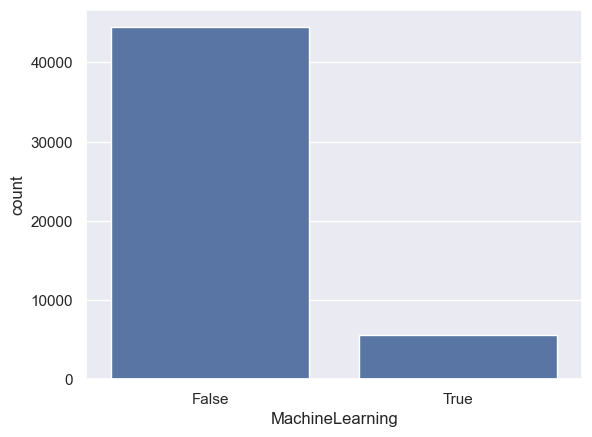

In [21]:
sns.countplot(x='MachineLearning', data=df, )
print(f"{df['MachineLearning'].mean() * 100}% labeled True")

To quickly get a feel for the distribution of data, we can use [`pandas-profiling`](https://github.com/pandas-profiling/pandas-profiling).

Note that the output is long and scrollable, so be sure to scroll through.

Some quick observations from this report are:
* We should drop the `FavoriteCount` column, since it's highly correlated with `Score`
* `Score, ViewCount, AnswerCount` are highly skewed, so we might take that into account in data preparation.
* Our label `MachineLearning` is not too strongly related with any other single feature
* The `CreationDate` field is negatively correlated with most numeric fields, which would make sense as newer questions haven't had as much time to gather views, upvotes and answers.
* `Body_Len` is negatively correlated with `AnswerCount`, which also makes sense - people are probably less inclined to read through a long question before answering it

There are probably many other things to learn from this report, but we'll leave it for now. [In the next part of the tutorial](https://dagshub.com/docs/tutorial/1-experiments), we'll use what we've learned about the data to process it for training models.

In [22]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# Drop the correlated features
df = df.drop(columns=['FavoriteCount'])

In [24]:
df

Title  \
0            Accepting null hypothesis given specificity   
1      How do I calculate the probability of victory,...   
2      Is joint modelling with survival and longitudi...   
3        Are Spiking Neural Networks The Next Big Thing?   
4      Public data and examples for practicing distri...   
...                                                  ...   
49995  How to draw one standard deviation range aroun...   
49996  Beta regression where fractional response adds...   
49997  Proof of alternative parameterization of Weibu...   
49998               A powerful test for any distribution   
49999  Cox regression - non-time dependent continuous...   

                                                    Body        CreationDate  \
0      <p>In a population of 10000 people, there is a... 2020-11-08 03:59:02   
1      <p>If I have a poll of 600 people (standard de... 2020-11-08 02:09:11   
2      <p>I would like to know if joint models for su... 2020-11-08 01:55:08   
3      <p>Intel recently announced their Loihi chip a... 2020-11-08 00:37:13   
4      <p>Are there public data for practicing distri... 2020-11-08 00:09:25   
...                                                  ...                 ...   
49995  <p>I have a distribution of data with a positi... 2018-10-11 18:36:02   
49996  <p>I have a data set of people switching brand... 2018-10-11 17:55:19   
49997  <p>In Parametric Survival Models by German Rod... 2018-10-11 17:51:32   
49998  <p>Simulations by Razali et al (2011) showed t... 2018-10-11 17:39:16   
49999  <p>I have this model I want to run that has no... 2018-10-11 17:29:12   

       Score  ViewCount  AnswerCount  CommentCount  CreationDate_Epoch  \
0          0          5            0             2          1604807942   
1          0         20            0             0          1604801351   
2          0          5            0             0          1604800508   
3          0         18            0             4          1604795833   
4          1         10            0             3          1604794165   
...      ...        ...          ...           ...                 ...   
49995      0         52            1             3          1539282962   
49996      2         97            0             2          1539280519   
49997      2        178            0             1          1539280292   
49998      1        111            1             4          1539279556   
49999      0         81            1             3          1539278952   

       MachineLearning  Title_Len  Body_Len  
0                False         43       542  
1                False         99       730  
2                False         88       148  
3                 True         47       992  
4                False         61       904  
...                ...        ...       ...  
49995            False         81       713  
49996            False         58      1864  
49997            False         63      1327  
49998            False         36      1156  
49999            False         72      2106  

[50000 rows x 11 columns]

## Processing the data

First things first - we should split the data into train and test sets.

Even before training the model itself, the preprocessing stages are supposed to fit only the training data, not the test data.

In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df)

Here, we try to scale and transform the numeric features to make them smoother, less skewed, and more appropriate for modeling.

`PowerTransformer` attempts to make the data more like a normal distribution, which should soften the impact of extreme outliers and make the distributions smoother.

`MinMaxScaler` is used as a first step to make sure the numbers are in a reasonable range, as `PowerTransformer` can fail on very large numbers.

In [26]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(MinMaxScaler(), PowerTransformer())
numeric_col_names = ['Title_Len','Body_Len','CreationDate_Epoch','AnswerCount','ViewCount','Score','CommentCount']
train_df_norm = pd.DataFrame(pipeline.fit_transform(train_df[numeric_col_names]), columns=numeric_col_names)
train_df_norm = train_df_norm.combine_first(train_df.reset_index()) # Add the other columns back

In [27]:
test_df_norm = pd.DataFrame(pipeline.transform(test_df[numeric_col_names]), columns=numeric_col_names)
test_df_norm = test_df_norm.combine_first(test_df.reset_index()) # Add the other columns back

Looking at the new distribution of the features, we can see they're now scaled correctly and not as skewed.

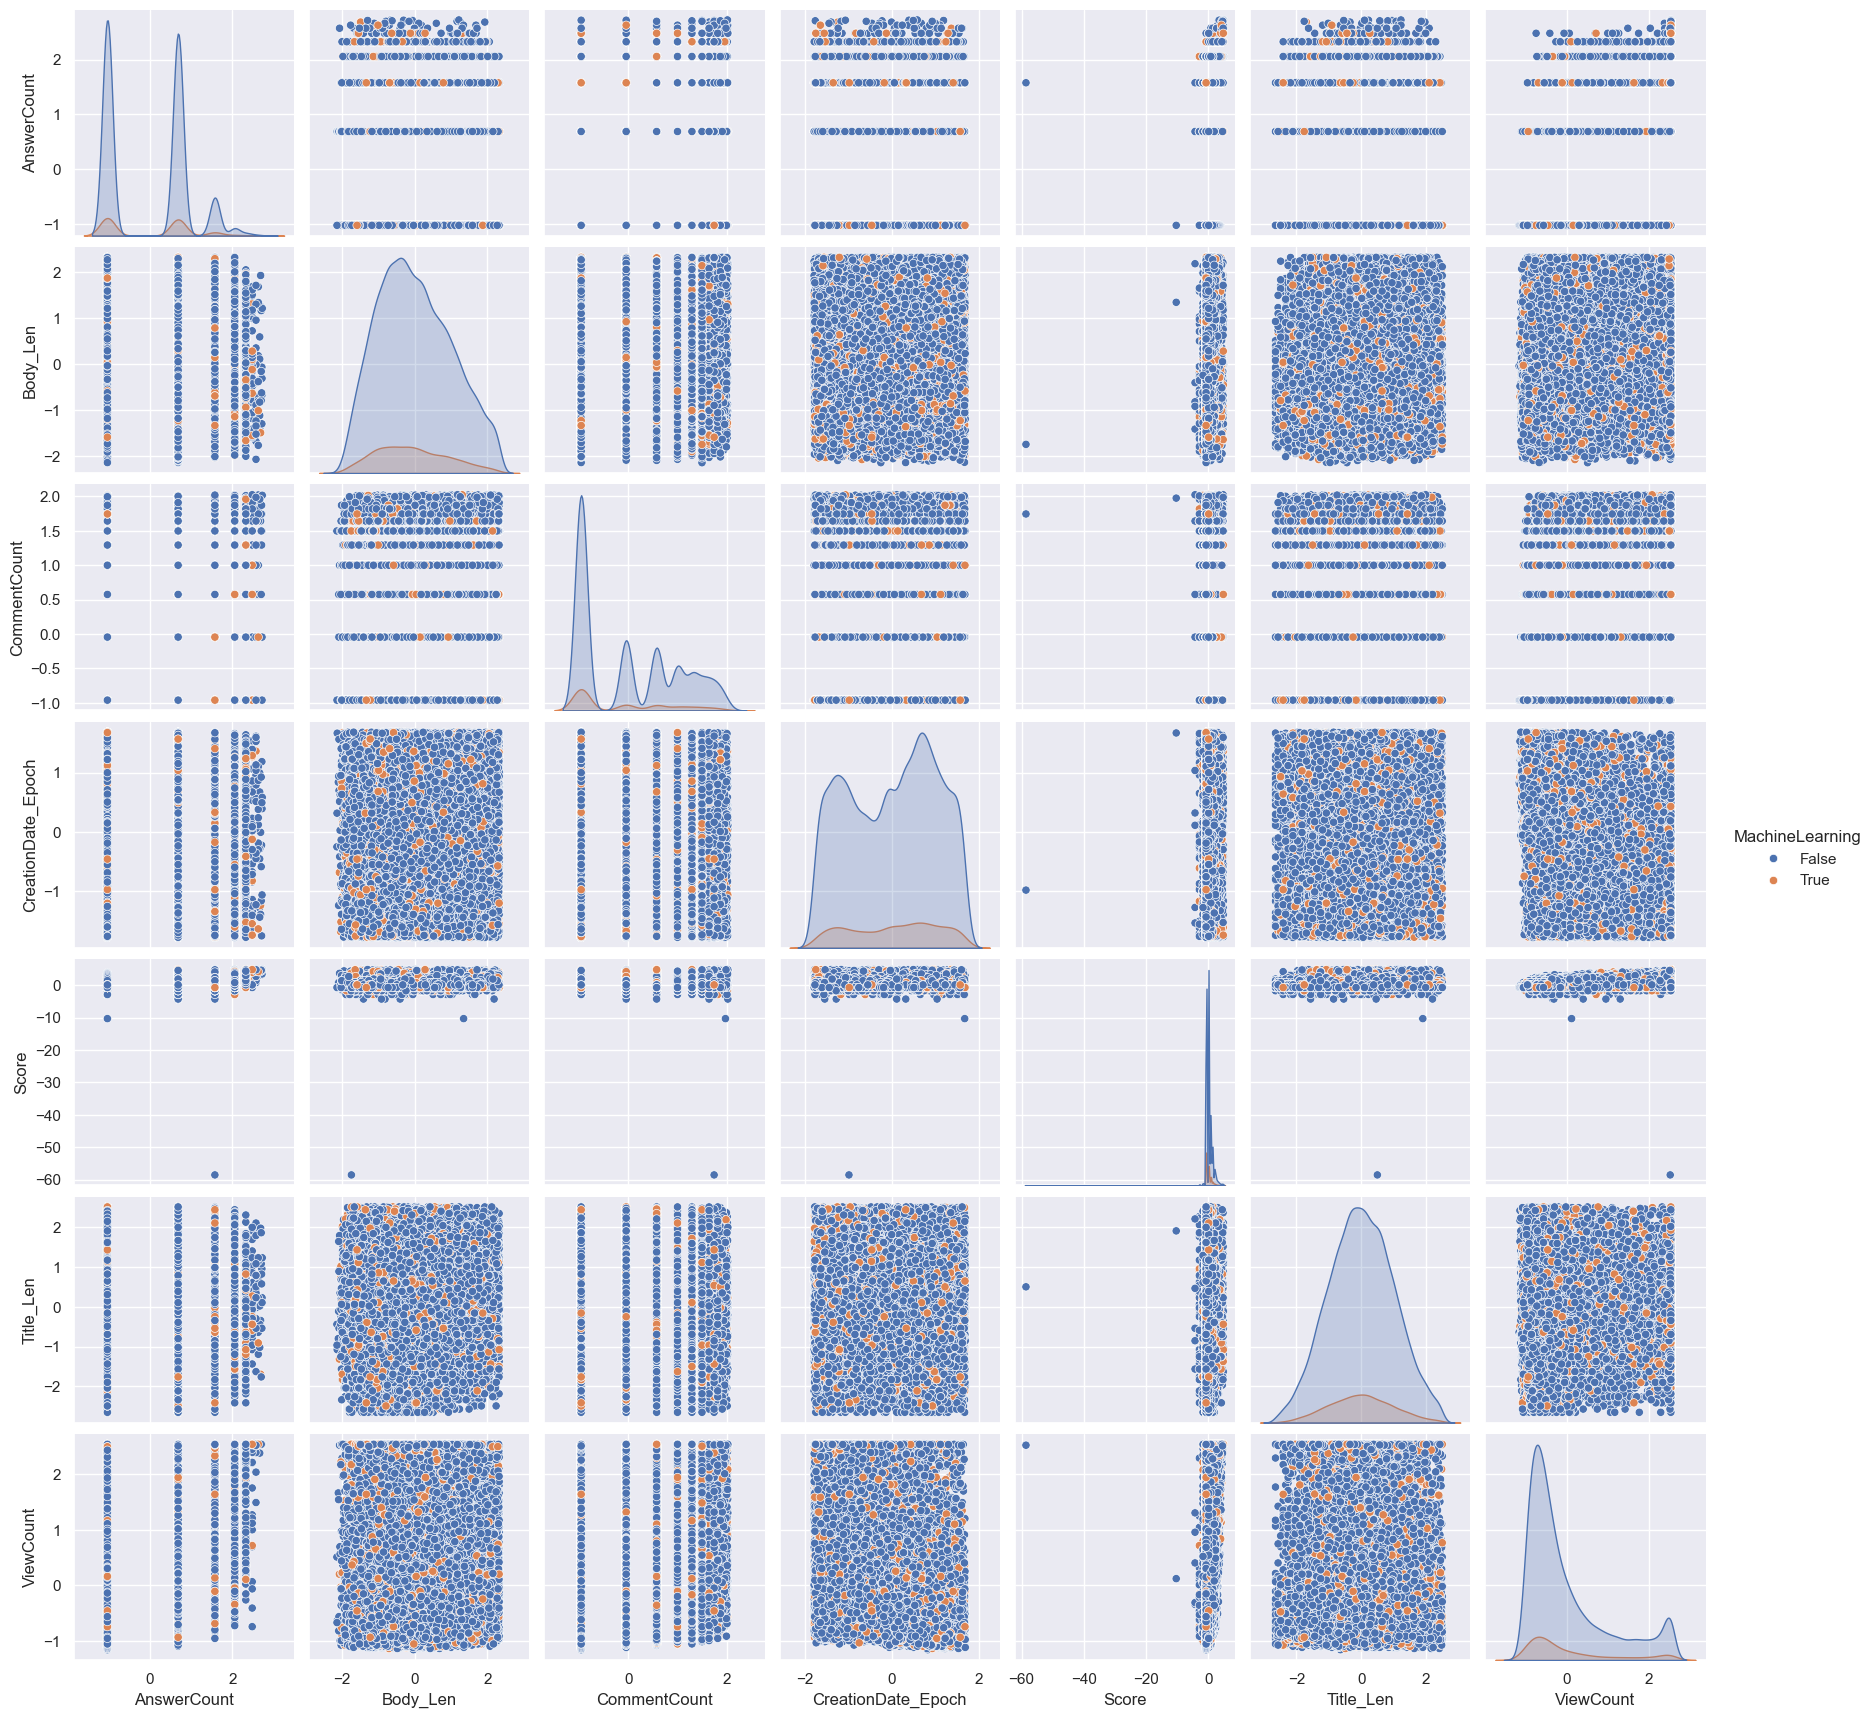

In [28]:
sns.pairplot(train_df_norm.drop(columns=['index','CreationDate']), hue='MachineLearning')

## Model training

Now, we'll fit a basic Logistic Regression model to our data, to see that it manages to learn anything. We're not trying to optimize it yet, just see that it successfully learns something useful, and that our preparation of the data helped.

For the time being, we'll only use the *numeric* columns for this model. The textual columns require specialized preprocessing before they can be used as input to a model.

We'll drop the `CreationDate` column, as its information is already stored in the scaled `CreationDate_Epoch` column.

To get a good idea of how well the model learned something useful about the data, we also reserve some of the data for testing.

In [29]:
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegression()
train_cols = [c for c in numeric_col_names if c != 'CreationDate']
X = train_df_norm[train_cols]
y = train_df_norm['MachineLearning']
clf.fit(X, y)

LogisticRegression()

## Evaluation

Since we know that the classes are very imbalanced (only about 8% of the questions labeled as `machine-learning`), we'll avoid using the accuracy metric as an indication. Instead, we'll take a look at the precision-recall curve and ROC, which can tell us more useful information.

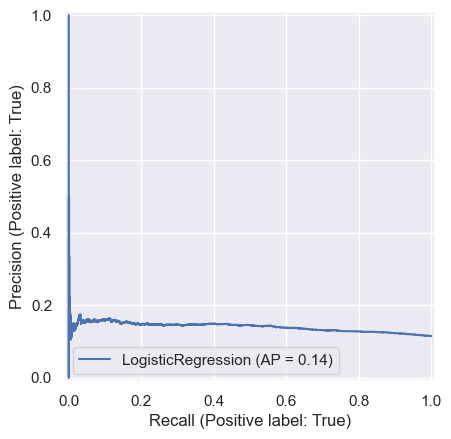

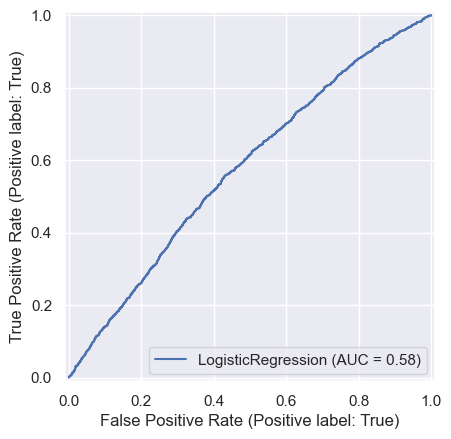

In [34]:
import sklearn.metrics
X_test = test_df_norm[train_cols]
y_test = test_df_norm['MachineLearning']
sklearn.metrics.PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
sklearn.metrics.RocCurveDisplay.from_estimator(clf, X_test, y_test)

We can also look at the learned feature importances to understand what our model is looking for:

<Axes: >

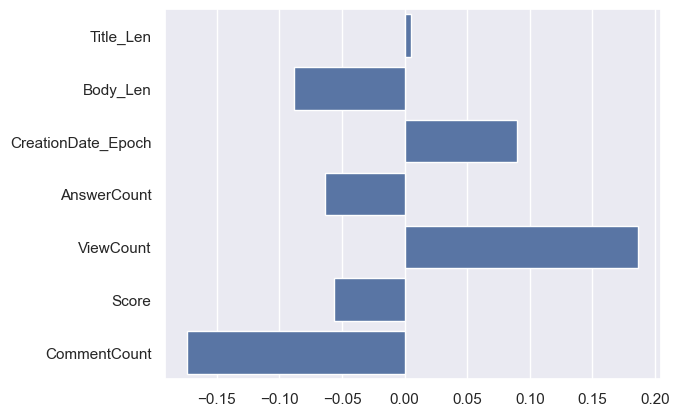

In [35]:
sns.barplot(y=train_cols, x=clf.coef_[0])

Looking at the following curves, we can see that the model really did learn useful information from the data, better than random at least.

Let's compare to a classifier trained on the unscaled data:

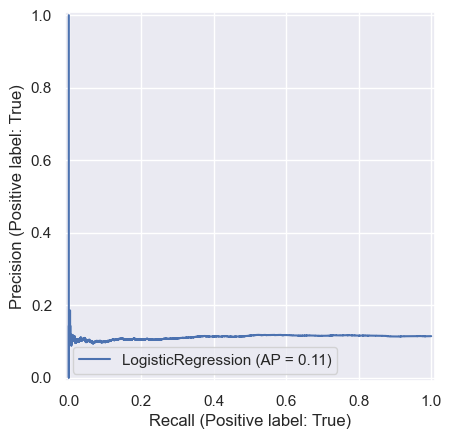

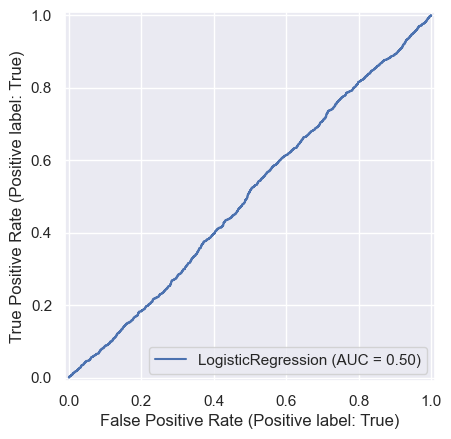

In [37]:
clf_raw = sklearn.linear_model.LogisticRegression()
X_raw = train_df[train_cols]
y_raw = train_df['MachineLearning']
clf_raw.fit(X_raw, y_raw)

X_test_raw = test_df[train_cols]
y_test_raw = test_df['MachineLearning']
sklearn.metrics.PrecisionRecallDisplay.from_estimator(clf_raw, X_test_raw, y_test_raw)
sklearn.metrics.RocCurveDisplay.from_estimator(clf_raw, X_test_raw, y_test_raw)

Clearly our data preprocessing helped - using the raw data yielded results that are even worse than random!

For sanity checking, let's compare it to a naive model, which always just guesses the common label:

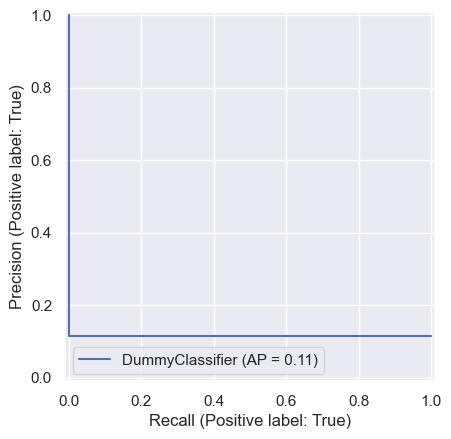

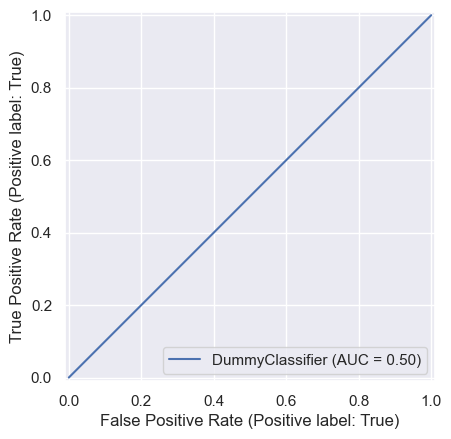

In [38]:
import sklearn.dummy
clf_dummy = sklearn.dummy.DummyClassifier()
clf_dummy.fit(X, y)

sklearn.metrics.PrecisionRecallDisplay.from_estimator(clf_dummy, X_test, y_test)
sklearn.metrics.RocCurveDisplay.from_estimator(clf_dummy, X_test, y_test)

## Textual Features

So, at this point we have a sense for our data, have found a good way to scale and normalze our *numeric* features, and have trained a very basic classifier on it.

The next phase would be to see what happens when we take advantage of our textual features - `Title` & `Body`. We'll use *only* the textual features to simplify things and isolate the effects.

To make things simple, we'll unify them into one big textual column.

In [39]:
train_text_col = train_df_norm['Title'].fillna('') + ' ' + train_df_norm['Body'].fillna('')
test_text_col = test_df_norm['Title'].fillna('') + ' ' + test_df_norm['Body'].fillna('')

To turn this text into numerical features that can be used as input to a ML model, we'll use [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with a sensible limit of vocabulary size (`max_features=25000`). It will split the text into tokens, and give each question in the data a numerical representation of the frequency of tokens in that question.

Note that special care is needed when handling [sparse matrices in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html), and the result returned from `TfidfVectorizer` is a sparse matrix. **If you ignore this special handling, expect to run into out-of-memory errors, unresponsiveness and crashes as the sparse matrix gets inflated.**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=25000)
tfidf.fit(train_text_col)
train_tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf.transform(train_text_col), columns=tfidf.get_feature_names_out())
test_tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf.transform(test_text_col), columns=tfidf.get_feature_names_out())

**Interesting notes:** Looks like many of the learned terms are:
* Various numbers, like `00`, `00000000e` etc. It could be useful to prevent this splitting of numbers into many different terms in the vocabulary, since it probably won't matter to classifying the text.
* Multiple terms grouped together due to an underscore, like `variable_2`. This is probably an artifact of embedded Python or TeX code. It might help the model if we break these down to separate terms.
* Remember, the questions contain embedded HTML. While we're not seeing any terms that were clearly garbage created by HTML, it's a good bet that it will be useful to clean up the HTML tags in the text.

In [42]:
train_tfidf_df.sample(15, axis=1)

issue  emmeans  tradeoffs  occurrences   i4  delta_n  hermite  \
0        0.0      0.0        0.0          0.0  0.0      0.0      0.0   
1        0.0      0.0        0.0          0.0  0.0      0.0      0.0   
2        0.0      0.0        0.0          0.0  0.0      0.0      0.0   
3        0.0      0.0        0.0          0.0  0.0      0.0      0.0   
4        0.0      0.0        0.0          0.0  0.0      0.0      0.0   
...      ...      ...        ...          ...  ...      ...      ...   
37495    0.0      0.0        0.0          0.0  0.0      0.0      0.0   
37496    0.0      0.0        0.0          0.0  0.0      0.0      0.0   
37497    0.0      0.0        0.0          0.0  0.0      0.0      0.0   
37498    0.0      0.0        0.0          0.0  0.0      0.0      0.0   
37499    0.0      0.0        0.0          0.0  0.0      0.0      0.0   

       survivability  mob  fnstatus2totally  meier  helps  partitioning  \
0                0.0  0.0               0.0    0.0    0.0           0.0   
1                0.0  0.0               0.0    0.0    0.0           0.0   
2                0.0  0.0               0.0    0.0    0.0           0.0   
3                0.0  0.0               0.0    0.0    0.0           0.0   
4                0.0  0.0               0.0    0.0    0.0           0.0   
...              ...  ...               ...    ...    ...           ...   
37495            0.0  0.0               0.0    0.0    0.0           0.0   
37496            0.0  0.0               0.0    0.0    0.0           0.0   
37497            0.0  0.0               0.0    0.0    0.0           0.0   
37498            0.0  0.0               0.0    0.0    0.0           0.0   
37499            0.0  0.0               0.0    0.0    0.0           0.0   

       milliseconds  4650  
0               0.0   0.0  
1               0.0   0.0  
2               0.0   0.0  
3               0.0   0.0  
4               0.0   0.0  
...             ...   ...  
37495           0.0   0.0  
37496           0.0   0.0  
37497           0.0   0.0  
37498           0.0   0.0  
37499           0.0   0.0  

[37500 rows x 15 columns]

In [43]:
clf_tfidf = sklearn.linear_model.LogisticRegression()
clf_tfidf.fit(train_tfidf_df.sparse.to_coo(), y)

LogisticRegression()

## Evaluating the textual model
Below, we can see that the new text-based model performs stunningly well!

This is not surprising, as most information will be contained in the text content of each question.

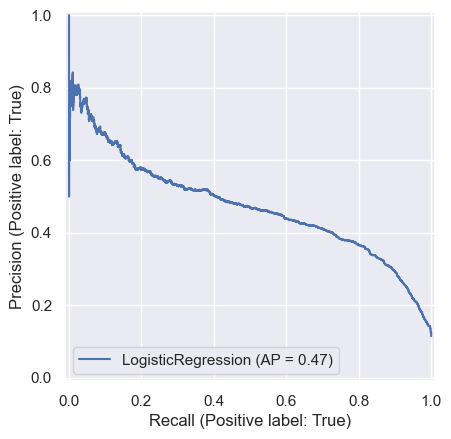

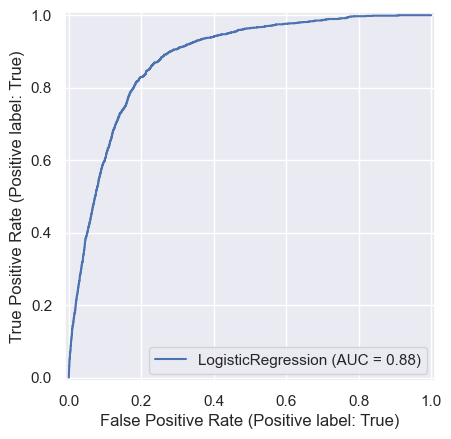

In [45]:
X_tfidf_test = test_tfidf_df.sparse.to_coo()

sklearn.metrics.PrecisionRecallDisplay.from_estimator(clf_tfidf, X_tfidf_test, y_test)
sklearn.metrics.RocCurveDisplay.from_estimator(clf_tfidf, X_tfidf_test, y_test)

As a sanity check, it's a good idea to check what terms the textual model cares about when making its decision.

As we see below, it looks like our model learned some very good, sensible terms, that we would have probably guessed on our own, such as `machine`, `learning`, `classifier`, etc.

It's interesting to note that `analysis` is a *negative*  predictor for a question about machine learning, as opposed to a general statistical question. Just throw a neural network at it 😅

<Axes: xlabel='coef', ylabel='term'>

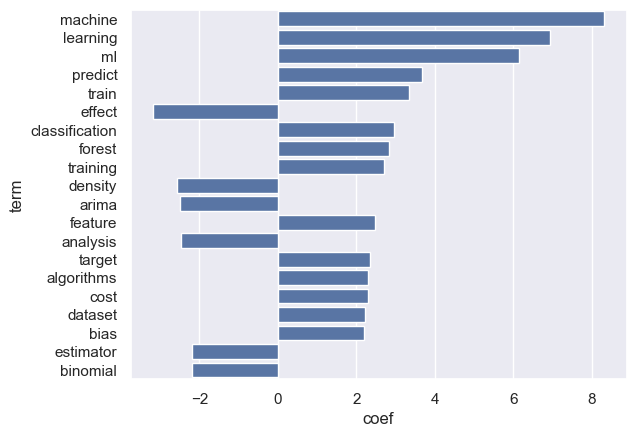

In [47]:
tfidf_coef_df = pd.DataFrame({'coef':clf_tfidf.coef_[0]})
tfidf_coef_df['term'] = tfidf.get_feature_names_out()
tfidf_coef_df['coef_abs'] = tfidf_coef_df['coef'].abs()
tfidf_coef_df = tfidf_coef_df.sort_values('coef_abs', ascending=False)
sns.barplot(y='term', x='coef', data=tfidf_coef_df[:20])

# Conclusion

We got a good sense of our data, the type of preprocessing required, and managed to train some decent classifiers with it.

At this point in a Python data science project, it's common to take the conclusions and working code from the exploratory notebook, and turn them into normal Python modules. This enables us to more easily:
* Create reusable components that will be useful as the project matures.
* Use code versioning tools like Git.
* Make the process more reproducible by defining a clear pipeline (order of operations) for the data and model training.
* Automate running and tracking of experiments.
* Version our different experiments and models, so that we preserve knowledge and don't risk losing work by accident.

[In the next level of DAGsHub's tutorial](https://dagshub.com/docs/experiment-tutorial/1-setup/), we'll take what works from this notebook and turn it into a Python project, before [going forward with experimentation](https://dagshub.com/docs/experiment-tutorial/2-experiments/) to find the best performing model for out problem.

Made with 🐶 by [DAGsHub](https://dagshub.com).